# Lesson 8: Relations -- Definitions and basic ideas

## Overview 

__Summary:__ In this lesson we begin to study one of the three main _discrete structures_ of this course, namely the idea of a __relation__. The concept of the relation is quite simple to grasp, and this will be our first order of business. Then we will spend a good amount of time discussing how to _represent_ relations as _data structures_ as _lists of tuples_, as _directed graphs_, as _matrices_, and as _Python dictionaries_ with the ultimate goal of being able to switch from one to the other. As a bonus, this lesson introduces the __SageMath__ computer algebra system which will be our primary computing environment for the rest of the course. 

This lesson addresses the following learning target(s):

+ __R.3:__ I can represent a relation on a set as a list of tuples, an adjacency matrix, a directed graph, or a Python dictionary and convert from one representation to another.

---

## Background

### Part 1: Relations

Suppose a Mathematics Department consists of five faculty members: Alice, Bob, Chuck, Dave, and Ed. There are three committees in the department: the Curriculum Committee, the Student Affairs Committee, and the Advisory Committee. The table below shows the committees to which each member belongs: 

| Faculty | Committees this faculty member belongs to | 
|:------- | :---------------------------------------- |
| Alice   | Advisory, Student Affairs                 |
| Bob     | Advisory                                  | 
| Chuck   | Curriculum                                | 
| Dave    | Curriculum, Student Affairs               | 
| Ed      | Curriculum                                |

This is like a little database, and it could be useful if, for example, we were thinking about asking one of these faculty members to join a new committee -- we could look them up in this database and see the committees they already belong to, and this could help our decision making. 

In other words what this table does is _relate_ two things: The first "thing" is a faculty member and the second "thing" is a committee. Alice is "related to" both the Advisory and Student Affairs committees. Chuck is "related to" Curriculum. Here we are using the phrase "related to" as a way of saying "is a member of". 

If this is useful then it's worth thinking about how we might represent this table in a computer. Tables themselves are not really computer-friendly. Here is one way: _Store the table as a list of ordered pairs or "tuples"._ For example, the table above would be: 

    [(Alice, Advisory), (Alice, Student Affairs), (Bob, Advisory), (Chuck, Curriculum), (Dave, Curriculum), 
    (Dave, Student Affairs), (Ed, Curriculum)]
    
This has the advantage that it's easy to iterate over the list and, for example, find all the pairs that have Alice in the "first coordinate" and then return the "second coordinate". This would print off the committees that Alice belongs to.

Here's another database-like structure that could be useful. Suppose we have five students: Ronald, Scott, Trish, Uriah, and Victoria. These students have joined a new social network called BookFace. In BookFace, user "follow" other users by clicking a button. This relationship does not have to go both ways -- one user can follow another without the other user following back. Here is a table like the one above that shows the state of affairs on BookFace: 

| User | Follows these users:             | 
|:---  | :------------------------------  | 
| Ronald | Scott, Trish                   |
| Scott  | Uriah, Trish                   |
| Trish  | (nobody)                       | 
| Uriah  | Ronald, Scott, Trish, Victoria | 
| Victoria | Uriah, Scott                 | 

Here too, this table is like a database that "relates" two things -- this time each "thing" is a user. Ronald is "related to" Scott  in the sense of "related to" = "follows". Ronald is also "related to" and Trish. Trish is related to nobody. And so on. 

As a list of tuples, this table would look like this: 

    [(Ronald, Scott), (Ronald, Trish), (Scott, Uriah), (Scott, Trish), (Uriah, Ronald), (Uriah, Scott), 
    (Uriah, Trish), (Uriah, Victoria), (Victoria, Uriah), (Victoria, Scott)]

Notice there are no pairs starting with Trish, because Trish doesn't follow anyone. 

What we are seeing here are two instances of a general, abstracted mathematical idea that has great power: 

>__Definition:__ A _relation_ from a set $A$ to a set $B$ is a set of ordered pairs $(a,b)$ with $a \in A$ and $b \in B$. That is, a relation from $A$ to $B$ is a subset of the cartesian product $A \times B$. 

[Click here for a quick review of the cartesian product](http://study.com/academy/lesson/how-to-find-the-cartesian-product.html) if this term is unfamiliar. 

So in the first example above, the table that shows the faculty and committees is a relation from the set $A = \{ \text{Alice, Bob, Chuck, Dave, Ed}\}$ to the set $B = \{\text{Advisory, Student Affairs, Curriculum}\}$. Just like our list of ordered pairs, a relation is a _set_ whose elements consist of ordered pairs or "tuples" where the first coordinate comes from $A$ and the second one comes from $B$. It doesn't consist of _all possible_ pairs of this form; just the ones specified by the table. 

In the second example above, for BookFace, this is a relation from $A = \{\text{Ronald, Scott, Trish, Uriah, Victoria}\}$ to $B = \{\text{Ronald, Scott, Trish, Uriah, Victoria}\}$. Of course the sets $A$ and $B$ are the same this time as you can see. In other words, BookFace is a relation from $A$ __to itself__. Relations where the first and second sets are the same are very important for us, for example they model social networks. We have this definition for these kinds of relations where the two sets being related are the same: 

>__Definition:__ A relation from a set $A$ to itself is called a _relation on $A$_.

In this language, BookFace is a relation on the set $\{\text{Ronald, Scott, Trish, Uriah, Victoria}\}$. And again, this means that the relation is a set of tuples where the first coordinate comes from this set and so does the second coordinate. 

### Part 2: Representing Relations

We are mostly going to be concerned with relations on a single set, like BookFace. There are at least four different ways we can represent a relation on a set. 

First: We can represent the relation __ss a list of tuples.__ This is how we did the BookFace relation above and it's very true to the definition of relation as a subset of $A \times A$. 

Another way to represent the relation is as a __matrix__. In mathematics/CS language a _matrix_ is a rectangular array with _rows_ and _columns_. Here are two short videos that go over the basic notions of rows, columns, elements, and notation for matrices. If you are familiar with matrices (e.g. from MTH 227 or an advanced high school algebra course) you can skip these. Otherwise, watch both: 

+ [Matrices introduction](https://www.youtube.com/watch?v=0ntqagJP7Jc) (running time 6:09) 
+ [Matrix terminology](https://www.youtube.com/watch?v=mk_Pd3g4riA) (running time 3:17)

We can construct a matrix that represents a relation on a set $A$ like this: 

1. Create one row and one column for each element of $A$. 
2. If the element in row $i$ is related to the element in row $j$, put a 1 in the row $i$, column $j$ entry of the matrix. Otherwise put a 0. 

For example, here is the matrix for the BookFace relation, assuming the first row and column represent Ronald, the second row and second column represent Scott, and so on: 

<img src="bookfacematrix.png" height=200 width=200>

This is called the _adjacency matrix_ for the relation. It's basically a binary array that shows "1" or "True" where one element is related to another. 

A third way of representing a relation is _visually_ as follows. 

1. Create a circle or dot for each element in $A$, the set that the relation is working on. 
2. If $i, j \in A$ and $i$ is related to $j$, then draw an arrow from $i$ to $j$. 

Here is the picture for BookFace. The names are there but a little hard to read. 

<img src="bfgraph.png">

This kind of construction is called a __directed graph__. We use the term "graph" not in the sense you used in algebra or calculus (such as "the graph of a function"). For us, a _graph_ is a collection of circles or dots that we will call __nodes__, along with arrows or line segments that we call __edges__. The edges here are directed, hence the name "directed graph". Each user in BookFace is a node and the relationship is visualized by drawing an arrow from node 1 to node 2 if node 1 follows node 2. 

Note that sometimes the term "directed graph" is abbreviated as "digraph". 

Finally, a fourth way to represent a relation on a set $A$ is using Python syntax, namely the __dictionary__. A dictionary representation of a relation has the points of $A$ as the keys, and then the list of values following a key are the points to which the key is related. For example here is BookFace as a dictionary: 

    {'Ronald': ['Trish', 'Scott'],
     'Scott': ['Trish', 'Uriah'],
     'Trish': [],
     'Uriah': ['Ronald', 'Trish', 'Scott', 'Victoria'],
     'Victoria': ['Uriah', 'Scott']}
     
(The names are in quotes now because they are strings, and we need to remember to work with them as strings if we are going to do computer stuff with them.) The dictionary form is nice because basically it looks exactly like the original table. 

An important learning target for us early on in our study of relations is to be able to represent any given relation on a set in all four of these formats. As we will see below, the computer will help us greatly. 


---

To sum up parts 1 and 2: 

+ A relation from $A$ to $B$ is a set, consisting of ordered pairs drawn from the cartesian product $A \times B$. 
+ If $A$ and $B$ are the same then we just talk about a "relation on $A$". 
+ A relation encapsulates the idea of "relationships" in real life by pairing off items in one set with related items in another. Think: Databases. 
+ Relations can be represented in four ways: as _lists of tuples_, as _adjacency matrices_, as _directed graphs_, and as _Python dictionaries_. 

### Part 3: Introducing SageMath

Up until this point, computing has been sort of in the background for us. Now we are going to move it to the forefront by introducing a powerful tool: __SageMath__. 

SageMath is a computer algebra system used by professional mathematicians and scientists. By "computer algebra system" we mean a computing platform in which we can do symbolic mathematical work, not just number-crunching. SageMath is actually a patchwork of dozens of smaller, niche programs used by mathematicians for over two decades, all in one piece of software. 

Here is what you need to know about it: 

+ SageMath is free and open source. 
+ SageMath is built on Python, so all the Python you have learned up to this point can be used in SageMath. It is not a Python "library"; it's a separate program that uses Python syntax and is loaded with mathematical tools. 
+ As you might guess, you can run SageMath in SageMath Cloud. So you already have this software at your fingertips. (However you can also download and install it locally. Ask me how, if you are interested.) 
+ You can run SageMath in one of two ways: Either as a "SageMath Notebook" or in a Jupyter notebook. We will be using the latter, running SageMath inside a Jupyter notebook.

Setting up a Jupyter notebook to run SageMath is very easy. Create a Jupyter notebook as you usually do. Then, in the Jupyter notebook, look for the __Kernel__ menu along the top. Click that menu, then __Change Kernel__, and change it from __Python__ to __Sage__. You are now running SageMath. 

<img src="sagekernel-gif.gif">

Everything you already know how to do with Jupyter notebooks -- using LaTeX and Markdown, executing code, etc. -- still works just as you learned it. It's just now you have added the SageMath functionality to your workspace. In fact 
the notebook you are reading right now is a Jupyter notebook running Sage 6.9. 

_Side Note:_ Jupyter notebooks are set up to provide the same interactive, rich-text notebook experience and run any of a number of different languages within it. Python 2 and Python 3 are just two of those; Sage is another, and there are also kernels for Octave, Julia, R, Scala, and more. [Here are some details](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages).  

### Part 4: Using SageMath to work with relations

We are switching from "pure Python" to SageMath because SageMath contains a deep set of built-in functions for working with discrete structures of all sorts. These functions cannot simply be added on to Python through libraries (or, they _can_ be added on but it's a complex process). Let's get to know a few of these right away. 

We can enter a relation into SageMath in _any_ of the four formats discussed above. For the sake of argument, here is the BookFace relation, defined as a list of tuples: 

In [2]:
bookface = [('Ronald', 'Scott'), ('Ronald', 'Trish'), ('Scott', 'Uriah'), ('Scott', 'Trish'), ('Uriah', 'Ronald'), ('Uriah', 'Scott'), 
    ('Uriah', 'Trish'), ('Uriah', 'Victoria'), ('Victoria', 'Uriah'), ('Victoria', 'Scott')]

Since this is just a list, we can use Python to extract information from it. For example, suppose we wanted to know who Ronald follows. This short script will find out: 

In [4]:
for pair in bookface:
    if pair[0] == 'Ronald':
        print(pair[1])

Scott
Trish


To access the full power of SageMath for working with relations, we are now going to convert the list of tuples into a directed graph or "digraph". In SageMath, a digraph is a _class_ in the object-oriented programming sense, and we use the list of tuples to create an _instance_ of that class. The syntax is like this: 

In [5]:
bookfacegraph = DiGraph(bookface)

The variable name on the left can be whatever you want. But on the right notice it is `DiGraph` with capital `D` and `G`, then the list of tuples in the argument as a _constructor_. By entering this line of code, we have told SageMath to create an instance of a directed graph using the information contained in the `bookface` list. Notice though that nothing displayed on the screen when we entered this. To actually _see_ the digraph, we have to tell SageMath to "show" it. This is done using the `.show()` method: 

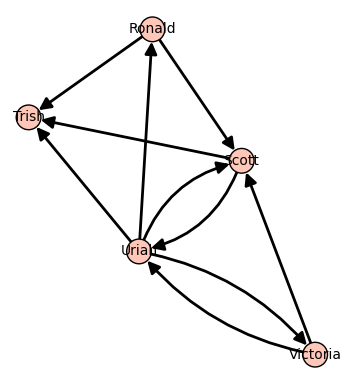

In [6]:
bookfacegraph.show()

There are some options that can be passed to the `.show()` method to control the appearance, but we won't discuss those here to keep things simple. 

Once the digraph has been defined, it's also very easy to generate the adjacency matrix. There's a built-in method for that: 

In [7]:
bookfacegraph.adjacency_matrix()

[0 1 1 0 0]
[0 0 1 1 0]
[0 0 0 0 0]
[1 1 1 0 1]
[0 1 0 1 0]

Notice: We generate the matrix using the _graph_, not the original list of tuples. 

If you want the matrix to look pretty, take that command and wrap it in the `show` command:  

In [9]:
show(bookfacegraph.adjacency_matrix())

[0 1 1 0 0]
[0 0 1 1 0]
[0 0 0 0 0]
[1 1 1 0 1]
[0 1 0 1 0]

You can even auto-generate the $\LaTeX$ code that made the matrix: 

In [11]:
latex(bookfacegraph.adjacency_matrix())

\left(\begin{array}{rrrrr}
0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 1 \\
0 & 1 & 0 & 1 & 0
\end{array}\right)

Finally, it's also simple to generate a dictionary for this relation, once it's been defined as a digraph, using the `.to_dictionary()` method: 

In [12]:
bookfacegraph.to_dictionary()

{'Ronald': ['Trish', 'Scott'],
 'Scott': ['Trish', 'Uriah'],
 'Trish': [],
 'Uriah': ['Ronald', 'Trish', 'Scott', 'Victoria'],
 'Victoria': ['Uriah', 'Scott']}

Most of these processes can be reversed. For example you can construct the digraph by starting with a dictionary instead of a list of tuples. You can also construct a digraph by giving it a matrix for input. 

To sum up what SageMath will do for us here: 

| To convert from     | Use:                       |
|:------------------  | :--------------------------|
| List to digraph     | `myGraph = DiGraph(name_of_list)`    | 
| Digraph to matrix   | `myGraph.adjacency_matrix()`  |
| Digraph to dictionary | `myGraph.to_dictionary()`  | 


### Part 5: A time-saving SageMath trick

__Tab-completion:__ In a code cell, if you start typing a part of a command and then hit Tab, it will give you a list of all the possible ways to complete that command. You can then select the one you want and hit enter. 

<img src="tabcomplete.gif">

This actually works in Jupyter notebooks running _any_ kernel, so for example if you are using "pure" Python you can invoke tab-completion. 

## Preview Activities

The preview activities are found on Formative at this link: https://goformative.com/student/#/assignments/PUEJ694 

These are due one hour before class time on the day we discuss Lesson 8. 

## Daily Homework 

1. Consider the following relation on the set $A = \{1, 2, 3, 4, \dots, 12\}$: For any points $a,b \in A$, we will say that $a$ is related to $b$ if and only if $a$ divides $b$ (evenly with no remainder). For example $2$ is related to $10$ but $2$ is not related to $9$. Represent this relation as a set of tuples, an adjacency matrix, a digraph, and a dictionary. (You should try to do this by hand since this is the gist of the learning target. But also use SageMath to check your work and to get practice using the software.) 
2. Consider another relation on the same set $A$ as in the previous problem. This new relation is defined as follows: For any points $a,b \in A$, we will say that $a$ is related to $b$ if and only if $|a-b| = 5$. For example in this relation $4$ would be related to $9$ and vice versa, but $4$ would not be related to $12$. Represent this relation as a set of tuples, an adjacency matrix, a digraph, and a dictionary.

Suggestion: With 12 nodes, the digraphs will get big. I recommend drawing these on separate pages so that you'll have room, and in class discussions we can just throw them up on the document camera insread of reproducing them on the board. 